<a href="https://colab.research.google.com/github/gabrielatrindade/quarentenadados-alura/blob/master/Aula03_Visualizacao_e_Correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3

## Carregando os dados

In [0]:
from google.colab import files
uploaded = files.upload()

Saving movie_metadata.csv to movie_metadata.csv


In [0]:
imdb = pd.read_csv('movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Entendendo algumas features

In [0]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [0]:
imdb['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Audrey Wells         1
Andrew Traucki       1
Alain Resnais        1
Kristin Rizzo        1
Adam Brooks          1
Name: director_name, Length: 2398, dtype: int64

In [0]:
imdb['num_critic_for_reviews']

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

Vendo que o número mínimo é 1, será que os NaN (como é o caso do registro 4) foram pessoas que deixaram vazio?!

In [0]:
imdb['num_critic_for_reviews'].min()

1.0

In [0]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

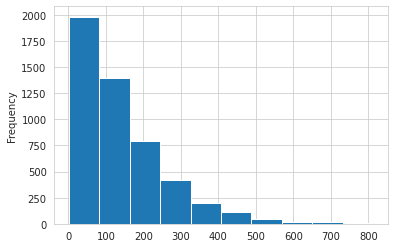

In [0]:
imdb['num_critic_for_reviews'].plot(kind='hist')

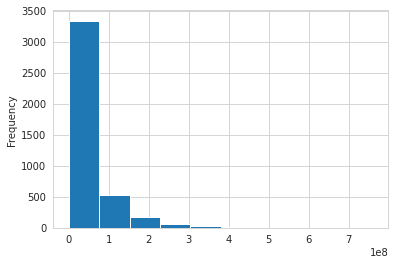

In [0]:
imdb['gross'].plot(kind='hist')

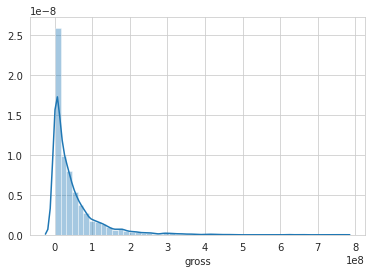

In [0]:
sns.distplot(imdb['gross'])

In [0]:
imdb.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [0]:
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4215,NaN,Zackary Adler,10.0,110.0,0.0,109.0,Kevin Leslie,490.0,NaN,Crime|Drama,Simon Merrells,The Rise of the Krays,1510,881,Kris Sommerville,0.0,NaN,http://www.imdb.com/title/tt2945796/?ref_=fn_t...,26.0,English,UK,R,2500000.0,2015.0,159.0,5.0,NaN,0
1511,Color,Wes Ball,297.0,113.0,47.0,129.0,Aml Ameen,988.0,102413606.0,Action|Mystery|Sci-Fi|Thriller,Ki Hong Lee,The Maze Runner,310903,1783,Jacob Latimore,0.0,based on novel|concrete wall|maze|open ended|t...,http://www.imdb.com/title/tt1790864/?ref_=fn_t...,524.0,English,USA,PG-13,34000000.0,2014.0,149.0,6.8,2.35,38000
188,Color,Tim Johnson,165.0,94.0,12.0,183.0,Matt Jones,17000.0,177343675.0,Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi,Jim Parsons,Home,70121,17883,April Winchell,0.0,alien friendship|alien invasion|australia|flyi...,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,214.0,English,USA,PG,135000000.0,2015.0,523.0,6.7,1.85,26000
3893,Color,Henry Hobson,256.0,95.0,9.0,428.0,J.D. Evermore,584.0,131175.0,Drama|Horror,Joely Richardson,Maggie,30219,1885,David A Cole,2.0,father daughter relationship|playing against t...,http://www.imdb.com/title/tt1881002/?ref_=fn_t...,200.0,English,USA,PG-13,8500000.0,2015.0,430.0,5.6,2.35,22000
32,Color,Shane Black,608.0,195.0,1000.0,3000.0,Jon Favreau,21000.0,408992272.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,Iron Man 3,557489,30426,Don Cheadle,3.0,armor|explosion|human bomb|missile attack|terr...,http://www.imdb.com/title/tt1300854/?ref_=fn_t...,1187.0,English,USA,PG-13,200000000.0,2013.0,4000.0,7.2,2.35,95000
2030,Color,Kevin Smith,247.0,101.0,0.0,92.0,Jeff Anderson,218.0,31452765.0,Comedy|Romance,Gerry Bednob,Zack and Miri Make a Porno,149835,638,Jennifer Schwalbach Smith,7.0,actor|friend|male frontal nudity|male full fro...,http://www.imdb.com/title/tt1007028/?ref_=fn_t...,243.0,English,USA,R,24000000.0,2008.0,216.0,6.6,1.85,0
518,Color,Des McAnuff,49.0,92.0,5.0,924.0,Janeane Garofalo,22000.0,26000610.0,Adventure|Animation|Comedy|Family|Fantasy,Robert De Niro,The Adventures of Rocky & Bullwinkle,16611,28050,Jonathan Winters,0.0,deforestation|fbi|lighthouse|moose|squirrel,http://www.imdb.com/title/tt0131704/?ref_=fn_t...,197.0,English,USA,PG,76000000.0,2000.0,1000.0,4.1,1.85,413
560,Color,Henry Selick,74.0,93.0,253.0,637.0,Bridget Fonda,3000.0,5409517.0,Animation|Comedy|Fantasy,Brendan Fraser,Monkeybone,14280,5580,Megan Mullally,0.0,carnival|coma|death|monkey|nightmare,http://www.imdb.com/title/tt0166276/?ref_=fn_t...,171.0,English,USA,PG-13,75000000.0,2001.0,889.0,4.7,1.85,683
4716,Color,Lance McDaniel,NaN,90.0,0.0,271.0,Steven Michael Quezada,595.0,NaN,Action|Drama|Thriller,Russell Wong,Light from the Darkroom,6,1754,Lymari Nadal,0.0,china|faith|panama|photography|suspense,http://www.imdb.com/title/tt3130704/?ref_=fn_t...,1.0,English,USA,PG-13,600000.0,2014.0,412.0,8.0,NaN,9
2071,Color,Paul Haggis,232.0,121.0,549.0,883.0,Charlize Theron,11000.0,6777589.0,Crime|Drama|Mystery|Thriller,James Franco,In the Valley of Elah,60115,24248,Barry Corbin,2.0,detective|iraq|military|murder investigation|p...,http://www.imdb.com/title/tt0478134/?ref_=fn_t...,224.0,English,USA,R,NaN,2007.0,9000.0,7.2,2.35,0


## Ajustando dados e Plotando para analise geral

Perguntas gerais:
*  aventura tem nota melhor que comédia? 
*  diretor com mais filmes tem nota melhor? tem mais faturamento?
*  as respostas são específicas para amostra ou para o mundo?
*  quais correlações existem entre os dados?
*  budget e gross (orçamento e faturamento)
*  title_year com algo?



In [0]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

In [0]:
color_or_bw['color_0_ou_1'] = (color_or_bw['color']=='Color') * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [0]:
color_or_bw['color_0_ou_1'].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

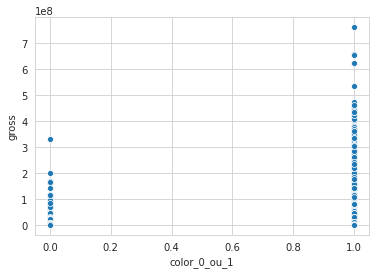

In [0]:
sns.scatterplot(data=color_or_bw, x='color_0_ou_1', y='gross')

In [0]:
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

Intervalo de Confiança?! Pesquisar

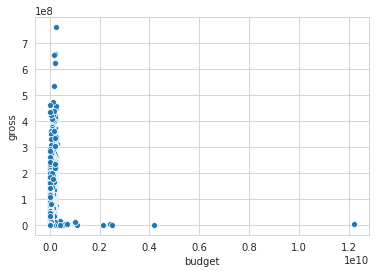

In [0]:
budget_gross = imdb[['budget', 'gross']].dropna().query('budget>0 | gross>0' )

sns.scatterplot(data=budget_gross,
                x='budget',
                y='gross')

procurando os outliers pra tentar remover

na busca por outliers abaixo, percebemos que o budget está muito alto. E vendo que os primeiros filmes nessa ordenação por budget são coreanos, imaginamos que a moeda utilizada está sendo diferente. A moeda coreana acrescenta três zeros quando comparada ao dolar americano.

In [0]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [0]:
imdb['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

Dessa maneira, vamos trabalhar com filmes americanos apenas.

In [0]:
imdb = imdb.drop_duplicates()

In [0]:
imdb_usa = imdb.query("country == 'USA'")

In [0]:
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


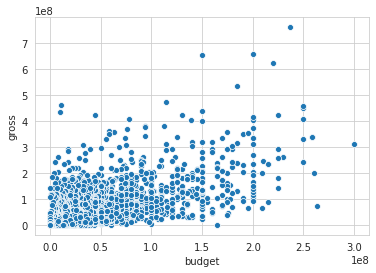

In [0]:
budget_gross = imdb_usa[['budget', 'gross']].dropna().query('budget>0 | gross>0' )

sns.scatterplot(data=budget_gross,
                x='budget',
                y='gross')

In [0]:
# lucro / prejuizo
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
imdb_usa.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


Analisando o lucro ao invés do faturamento, veremos que os pontos vão cair. Afinal, o lucro é menor que o faturamento (faturamento = lucro + orçamento)

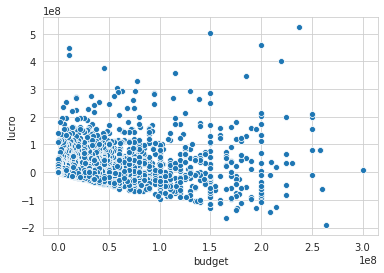

In [0]:
lucro_budget = imdb_usa.query('budget>0 | gross>0')[['lucro', 'budget']].dropna()

sns.scatterplot(data=lucro_budget,
                x='budget',
                y='lucro')

Outra reflexão que fica é que sobre aonde o filme foi lançado quando teve o snapshot dos dados. Foi lançado nos USA mas não ainda no Brasil?

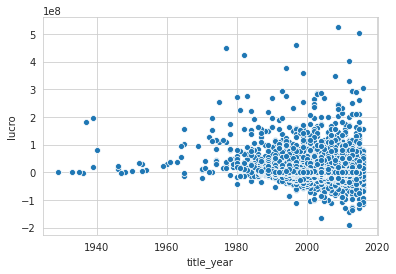

In [0]:
lucro_year = imdb_usa.query('budget>0 | gross>0').dropna()[['lucro', 'title_year']]

sns.scatterplot(data=lucro_year,
                x='title_year',
                y='lucro')

Pesquisar sobre feature engineer. <br>
Criamos uma nova feature (lucro) a partir de duas features anteriores (gross e budget).

In [0]:
filme_por_diretor = imdb_usa['director_name'].value_counts()
filme_por_diretor

Steven Spielberg    24
Martin Scorsese     20
Clint Eastwood      20
Woody Allen         18
Tim Burton          16
                    ..
Tom McGrath          1
Andy Garcia          1
Michael Pressman     1
Valeri Milev         1
Jason Naumann        1
Name: director_name, Length: 1812, dtype: int64

In [0]:
filmes_por_diretor_gross = (imdb_usa[['director_name', 'gross']]
                              .set_index('director_name')
                              .join(filme_por_diretor, on='director_name')
                              .rename(columns={'director_name' : 'qnt_filmes'})
                              .reset_index())
filmes_por_diretor_gross

,director_name,gross,qnt_filmes
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0
...,...,...,...
3768,Edward Burns,4584.0,4.0
3769,NaN,NaN,NaN
3770,Benjamin Roberds,NaN,1.0
3771,Daniel Hsia,10443.0,1.0


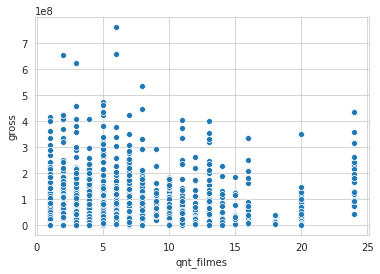

In [0]:
sns.scatterplot(data=filmes_por_diretor_gross,
                x='qnt_filmes',
                y='gross')

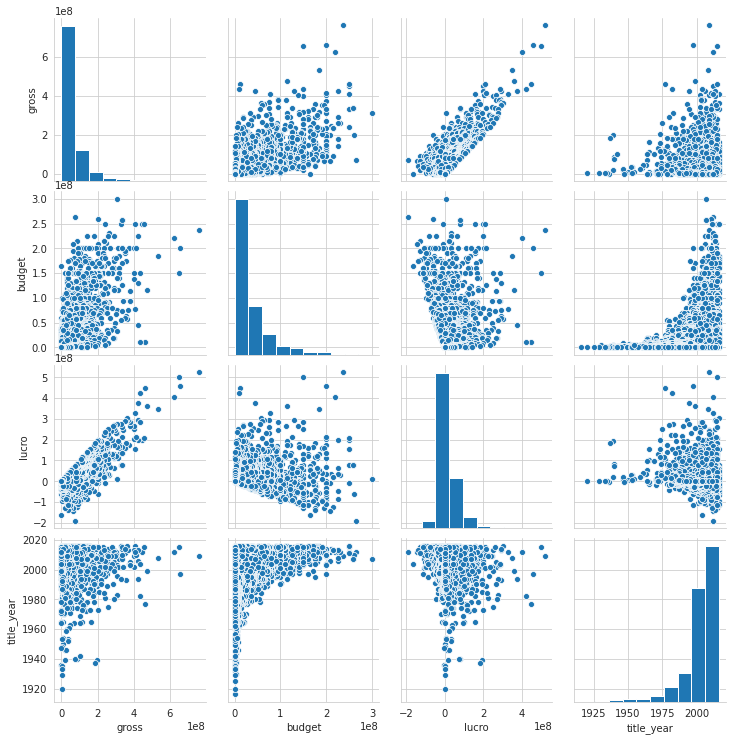

In [0]:
sns.pairplot(data=imdb_usa[['gross', 'budget', 'lucro', 'title_year']])

## Vamos falar um pouco mais de correlação.

Entre faturamento e faturamento a correlação é 1. O que isso significa? que quando um cresce o outro cresce igualmente.

<br>
O ano e gross parece não ter correlação.

<br>
É importante interpretar bem. Quando você lucra muito, você fatura (gross) muito --> não faz sentido, pois pra você lucrar precisa faturar, o faturamento vem antes do lucro.

Correlação não implica em causa, lembre! Precisa explorar pra encontrar a causa.

In [0]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


## Desafios

### Desafio 1: fazer box plot do filme colorido e branco levando em consideração a média


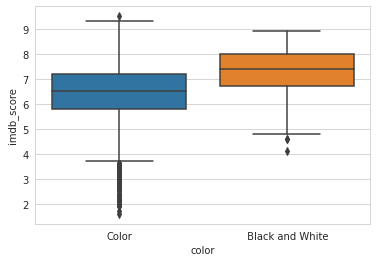

In [0]:
sns.boxplot(data = color_or_bw,
            x = 'color',
            y = 'imdb_score')

### Desafio 2: qual foi o filme que teve o maior prejuízo (próximo ao budget de 2.5)

In [0]:
lucro_year.sort_values('lucro').head(1)

,lucro,title_year
5,-190641321.0,2012.0


In [0]:
imdb_usa_budget_gross_positivo = imdb_usa.query('budget>0 | gross>0')

In [0]:
imdb_usa_budget_gross_positivo.sort_values('lucro').head(1)[['movie_title']]

,movie_title
5,John Carter


### Desafio 3: os filmes mais recentes tiveram mais prejuízo? (ano de lançamento e prejuízo tem relação?)

provavelmente sim, por que? porque se tiramos o snapshot desse dataset em setembro de 2017 e o filme lançado em setembro de 2017, os lucros dele ainda não estão contabilizados e provavelmente ele ainda está no prejuízo
O ponto indicado no desafio 2 tem uma chance de ser por causa disso, afinal o budget e o prejuízo deles está muito próximo.

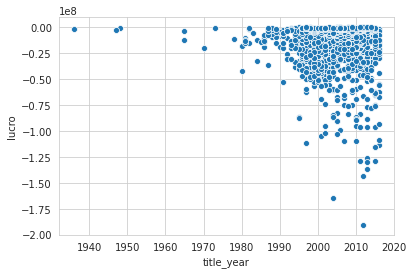

In [0]:
prejuizo_year = imdb_usa.query('lucro<0').dropna()[['lucro', 'title_year']]

sns.scatterplot(data=prejuizo_year,
                x='title_year',
                y='lucro')

In [0]:
imdb_usa.query('lucro<0')[['lucro', 'title_year']].corr()

,lucro,title_year
lucro,1.000000,-0.126637
title_year,-0.126637,1.000000


In [0]:
(imdb_usa
  .query('budget > 0 and gross > 0')
  .sort_values('title_year', ascending=False)
  .head(20)
  [['movie_title', 'lucro', 'title_year']])

,movie_title,lucro,title_year
163,Gods of Egypt,-108858926.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0
2404,My Big Fat Greek Wedding 2,41573085.0,2016.0
244,The Huntsman: Winter's War,-67047980.0,2016.0
1742,The Boss,34034755.0,2016.0
73,Suicide Squad,-13912817.0,2016.0
150,Ghostbusters,-25900341.0,2016.0
154,Kung Fu Panda 3,-1476537.0,2016.0
65,X-Men: Apocalypse,-23014913.0,2016.0
567,The Angry Birds Movie,34225164.0,2016.0


### Desafio 4: quem são os filmes antigos da pre 2 guerra que ganharam bastante dinheiro?


In [0]:
(imdb_usa_budget_gross_positivo
  .query('title_year < 1940')
    .sort_values('lucro', ascending=False) 
    .head(2)
    [['movie_title', 'lucro']])

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0


### Desafio 5: confirmar de quem são os filmes entre 15 e 20 (aproximadamente 18) no gráfico de gross x qnt_filme.


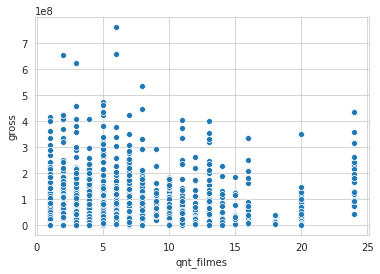

In [0]:
sns.scatterplot(data=filmes_por_diretor_gross,
                x='qnt_filmes',
                y='gross')

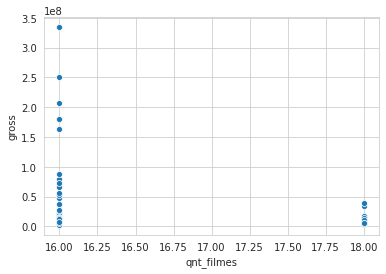

In [0]:
sns.scatterplot(data=filmes_por_diretor_gross.query('qnt_filmes>15 & qnt_filmes<20'),
                x='qnt_filmes',
                y='gross')

In [0]:
(filmes_por_diretor_gross
  .query('qnt_filmes==18')
  .merge(imdb_usa, how='left')
  .drop_duplicates('director_name')
  [['director_name']])

,director_name
0,Woody Allen


### Desafio 6: Interpretar melhor os gráficos. Mudar os marcadores.


### Desafio 7: Ver a correlação dos filmes depois de 2000. Interpretar, escrever o que evidenciou.

In [0]:
imdb_usa_apos_2000 = imdb_usa.query('title_year > 2000').dropna()

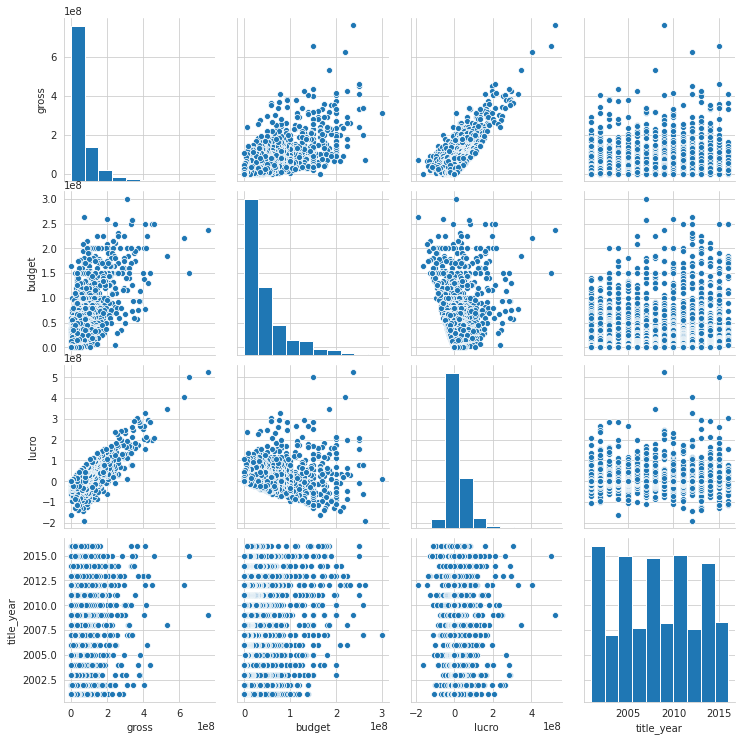

In [0]:
sns.pairplot(data=imdb_usa_apos_2000[['gross', 'budget', 'lucro', 'title_year']])

In [0]:
imdb_usa_apos_2000[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.702884,0.771525,0.117325
budget,0.702884,1.000000,0.089761,0.148362
lucro,0.771525,0.089761,1.000000,0.031581
title_year,0.117325,0.148362,0.031581,1.000000


Da resolução:

Em comparação à correlação anterior vista, para os filmes de depois de 2000 a correlação entre gross-budget e budget-lucro aumentou enquanto entre gross-lucro diminuiu, todos com pequenas margens de diferenças.

Olhando para budget-lucro, foi um aumento pequeno no valor da correlação desses filmes do imdb, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem semelhante.

### Desafio 8: tentar encontrar uma reta no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)


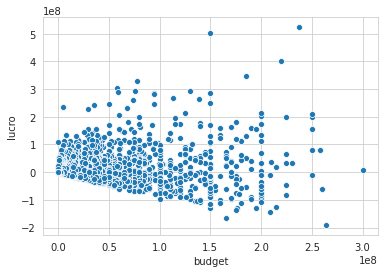

In [0]:
sns.scatterplot(data=imdb_usa_apos_2000,
                x='budget',
                y='lucro')

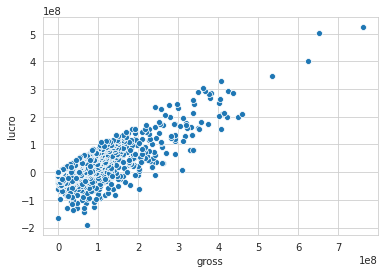

In [0]:
sns.scatterplot(data=imdb_usa_apos_2000,
                x='gross',
                y='lucro')

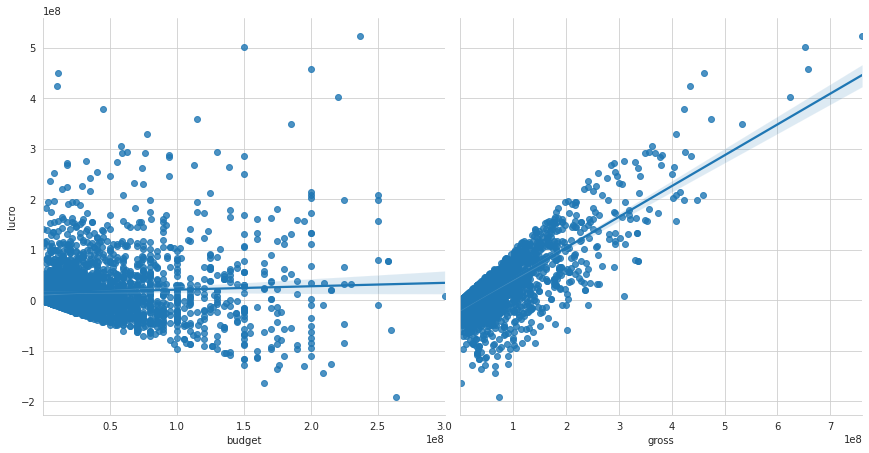

In [0]:
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

### Desafio 9: usar as notas nas correlações, nos gráficos. Número de avaliações por ano pode ser uma feature.

In [0]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.000000,0.645673,0.258948
budget,0.645673,1.000000,0.078936
imdb_score,0.258948,0.078936,1.000000


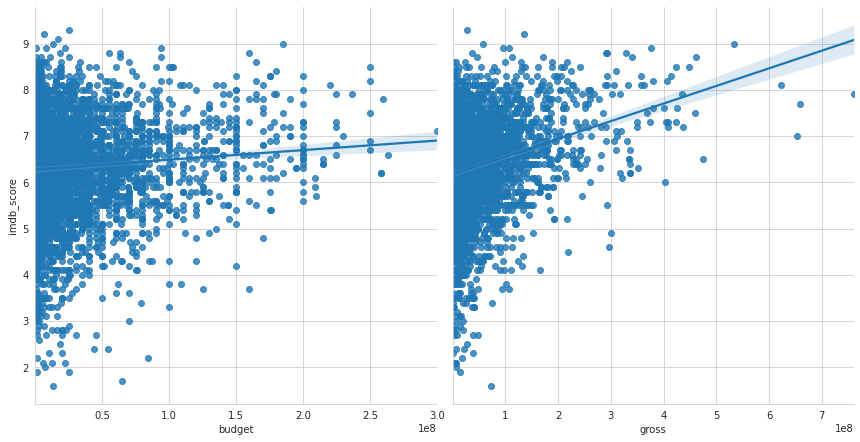

In [0]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')

In [0]:
votos_por_ano = imdb_usa.groupby('title_year')['num_voted_users'].mean()
imdb_usa_votos_por_ano = imdb_usa.join(votos_por_ano, on='title_year', rsuffix='rs')
imdb_usa_votos_por_ano.rename(columns={'num_voted_usersrs': 'votos_por_ano'}, inplace=True)
imdb_usa_votos_por_ano.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro,votos_por_ano
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,90459.213115
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,105898.240000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,116836.911765
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,116836.911765
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,105898.240000


In [0]:
imdb_usa_votos_por_ano[['title_year', 'votos_por_ano']].corr()

,title_year,votos_por_ano
title_year,1.000000,0.142897
votos_por_ano,0.142897,1.000000


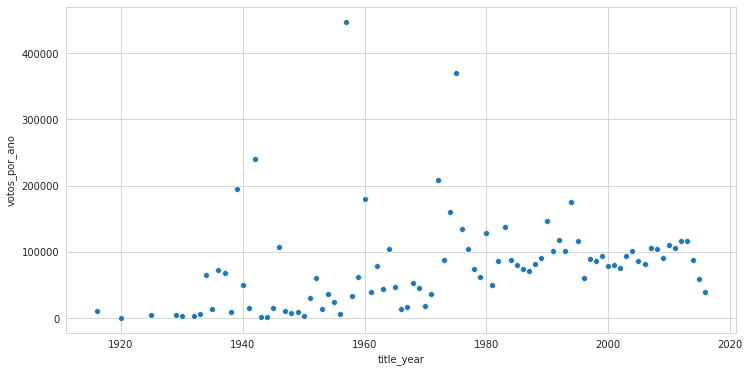

In [0]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_year', y='votos_por_ano', data=imdb_usa_votos_por_ano)